# Flights Delay Data Challenge 

This challenge involves analyzing flights operation data for various airlines. The goal is to find if a flight will be canceled or not by understanding various features. The response or target variable here is a categorical variable "canceled". This is a binary variable where 1 stands for "canceled", 0 stands for "non-canceled". The features are Month, DepartureTime, UniquerCarrier, SchedElapsed Time, ArrDelay, DepDelay, Distance.

Packages used: To solve this problem, I have used following packages:

Pandas - Data Wrangling
Matplotlib/Seaborn - Visualization
Scipy - Transformation
Sklearn - Machine Learning Model

In [1]:
import pandas as pd
import numpy as np
import warnings
from collections import Counter
from scipy import stats
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the inout file and loading into a pandas dataframe 

In [2]:
df = pd.read_csv('input/FlightDelays_Data_3.0.csv')

In [3]:
df.head()

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,1.0,12,814,UA,134.0,0.0,0,679.0
1,1.0,12,830,DL,90.0,0.0,0,214.0
2,1.0,1,1835,UA,213.0,0.0,0,1605.0
3,1.0,4,1730,AA,80.0,0.0,0,235.0
4,1.0,7,1442,UA,103.0,0.0,0,413.0


# Check Nan values

As part of EDA, I have checked if there is any missing values. as can be seen a very row has missing values and thus it is safe to drop them.

In [4]:
nullvalues = pd.isnull(df).sum()

In [5]:
nullvalues 

Canceled            1
Month               0
DepartureTime       0
UniqueCarrier       0
SchedElapsedTime    2
ArrDelay            1
DepDelay            0
Distance            1
dtype: int64

In [6]:
df.dropna(subset=['Canceled','SchedElapsedTime','ArrDelay', 'Distance'], inplace = True)

In [7]:
df.describe()

,Canceled,Month,DepartureTime,SchedElapsedTime,ArrDelay,DepDelay,Distance
count,5995.000000,5995.000000,5995.000000,5995.000000,5995.000000,5995.000000,5995.000000
mean,0.166639,6.221351,1330.433528,161.596997,8.116097,9.148290,990.901084
std,0.372684,3.435503,459.104885,78.157111,35.774451,31.675451,685.530027
min,0.000000,1.000000,5.000000,-127.000000,-72.000000,-16.000000,-439.000000
25%,0.000000,3.000000,930.000000,105.000000,-8.000000,-3.000000,547.000000
50%,0.000000,6.000000,1325.000000,145.000000,0.000000,0.000000,837.000000
75%,0.000000,9.000000,1715.000000,200.000000,10.000000,6.000000,1249.000000
max,1.000000,12.000000,2359.000000,604.000000,410.000000,387.000000,15990.000000


Here we can notice that the canceled variable mean is 0.16. Which means there are very less canceled flights than non-canceled.

In [8]:
df.dtypes

Canceled            float64
Month                 int64
DepartureTime         int64
UniqueCarrier        object
SchedElapsedTime    float64
ArrDelay            float64
DepDelay              int64
Distance            float64
dtype: object

Changing the datatype of canceled variable to int as during load, the pandas assumed it as a float value

In [9]:
df['Canceled'] = df.Canceled.astype(int)

# Descriptive Statistics
As mentioned earlier,  as can be seen below, clearly non-canceled flights are way more than canceled flights.

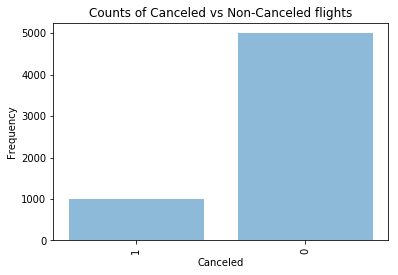

In [10]:
labels, values = zip(*Counter(df.Canceled).items())
y_pos = np.arange(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5, )
plt.xticks(y_pos, labels, rotation='vertical')
plt.xlabel('Canceled')
plt.ylabel('Frequency')
plt.title('Counts of Canceled vs Non-Canceled flights')
 
plt.show()

Below is the bar chart shows how many flights operated through out the given year. The number of flights operating is quite consistent through out the year though there is a slight decrease from Fall season to december. 

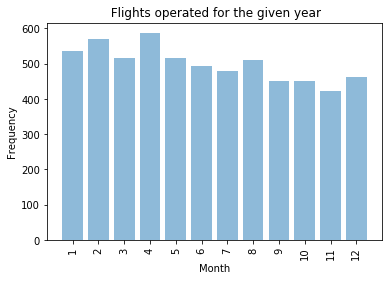

In [11]:
df_sorted = df.sort_values('Month',ascending=True)
labels, values = zip(*Counter(df_sorted.Month).items())
y_pos = np.arange(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5, )
plt.xticks(y_pos, labels, rotation='vertical')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title(' Flights operated for the given year')
 
plt.show()

There are three unique careers available in the dataset.

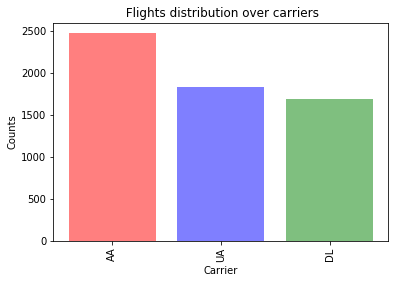

In [12]:
labels, values = zip(*Counter(df_sorted.UniqueCarrier).items())
y_pos = np.arange(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5, color = ['red', 'blue', 'green'])
plt.xticks(y_pos, labels, rotation='vertical')
plt.xlabel('Carrier')
plt.ylabel('Counts')
plt.title(' Flights distribution over carriers')
 
plt.show()

Below is the violin plot which shows the departure time probability distribution. Departure times are fairly normally distributed with a very slight tail.

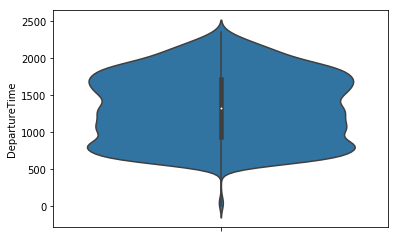

In [13]:
sns.violinplot( y=df["DepartureTime"] )

Scheduled Elapsed time is highly skewed with long tail. this means this one might need transformation as skewed variable can impact the model negatively. 

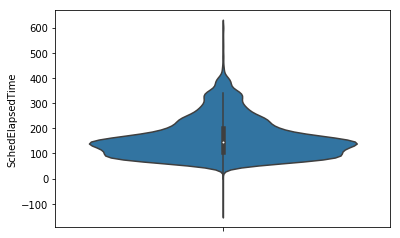

In [14]:
sns.violinplot( y=df["SchedElapsedTime"] )

The scheduled elapsed time is expected to be strongly corelated to distance as can be seen below.

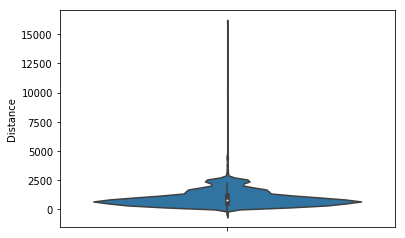

In [15]:
sns.violinplot( y=df["Distance"] )

As our target variable is "Canceled", we want to explore the corelation. One thing can be seen that there are few flights canceled when distance is long.

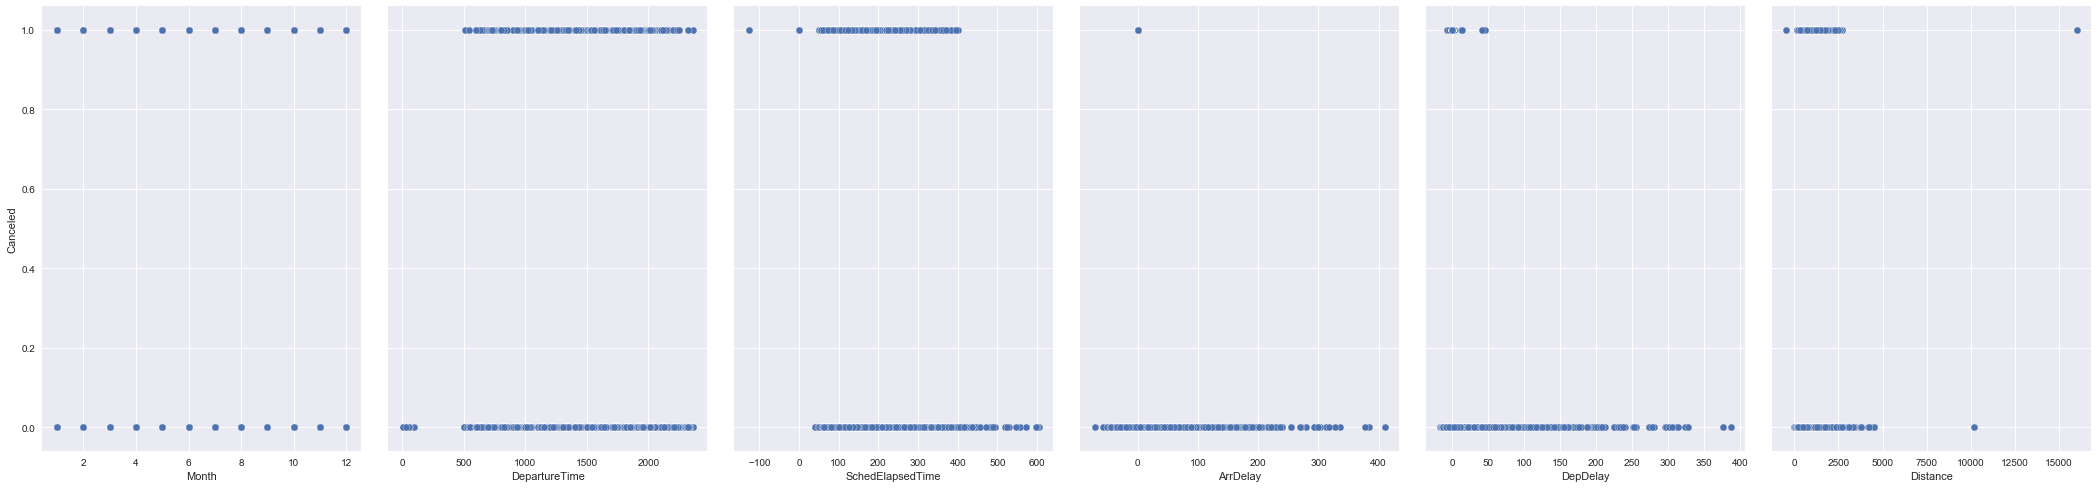

In [16]:
sns.set(font_scale=1.5)

sns.set()
sns.pairplot(df, x_vars=['Month','DepartureTime','SchedElapsedTime','ArrDelay', 'DepDelay','Distance'],
             y_vars ='Canceled', size = 7,aspect=0.7)
plt.show()

# Data Wrangling

There are few data wrangling tasks had to be done. For example:

a. we can see for one instance, the scheduled elapsed time is negative which is not possible. on further analysis, it was evident that it is just wrong data (could be morphed only for this challenged) as the similar distances is taking around 127 mins. 

b. On, other occasion, we can see scheduled elapsed time is 0.0. In that case, I have taken a mean value for other records with same distance and assigned the new elapsed time. 

c. It's also important to note that as we are only predicting if flight is canceled the arrival/departure delay will not affect this situation. so we will drop them.

d. One hot encoding is used to change the Carrier variable into a catergorical variable. Otherwise an integer value might impact the model.

In [17]:
regression_data = df.copy()
regression_data[regression_data['SchedElapsedTime'] <= 0 ]
df_224 = regression_data[(regression_data['Distance'] >=224) & (regression_data['Distance'] <= 224)].copy()
df_224.drop(['Canceled','Month', 'DepartureTime', 'UniqueCarrier', 'ArrDelay','DepDelay','Distance',],axis=1,inplace=True)
df_224.SchedElapsedTime.mean()
regression_data.replace(0.0, 68.0, inplace=True)
regression_data.replace(-127.0, 127.0, inplace=True)

# box cox transformation & one hot encoding

In [18]:
regression_data['SchedElapsedTime_normal'] = stats.boxcox(regression_data['SchedElapsedTime'])[0]
regression_data = pd.get_dummies(regression_data)

# drop features which are not required

In [19]:
regression_data.drop(['SchedElapsedTime', 'ArrDelay','DepDelay','Distance',],axis=1,inplace=True)

In [20]:
regression_data.head()

,Canceled,Month,DepartureTime,SchedElapsedTime_normal,UniqueCarrier_AA,UniqueCarrier_DL,UniqueCarrier_UA
0,1.0,12,814,3.976514,0,0,1
1,1.0,12,830,3.713602,0,1,0
2,1.0,1,1835,4.271223,0,0,1
3,1.0,4,1730,3.634015,1,0,0
4,1.0,7,1442,3.803758,0,0,1


# Machine Learning model.

We are now ready to train the model. Due to time constraint, I have only trained logistic regression. To do that, I have used SKlearn packages. I have also used Kfold as 10. 

In [21]:
from sklearn.model_selection import train_test_split
y = regression_data['Canceled']
X = regression_data.drop('Canceled',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
kfold = StratifiedKFold(n_splits=10, random_state=42)
lr_model = LogisticRegressionCV(cv=kfold,class_weight='balanced',random_state=42)
lr_model.fit(X_train,y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix, classification_report

In [ ]:
accuracy = cross_val_score(lr_model, X_train, y_train, cv=kfold,scoring='accuracy')
log_loss = cross_val_score(lr_model, X_train, y_train, cv=kfold, scoring='neg_log_loss')

print('Mean Accuracy: %s' % accuracy.mean())
print('Mean Log Loss: %s' % log_loss.mean())


The mean accuracy of this model across the ten folds used in cross validation is about 59.4%

In [ ]:
lr_model.score(X_test,y_test)

In [ ]:
y_pred_lr = lr_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_lr))

In [ ]:
roc_auc = cross_val_score(lr_model, X_train, y_train, cv=kfold, scoring='roc_auc')
print('Mean Area Under ROC Curve: %s' % roc_auc.mean())

# pipeline building



In [22]:
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [23]:
# Create standardizer
standardizer = StandardScaler()

# Create logistic regression object
logit = LogisticRegression()

# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Conduct k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             X, # Feature matrix
                             y, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

# Calculate mean
cv_results.mean()

0.8333614357262104

In [ ]:
# Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Final Thoughts

The results found above is not impressive but somewhere in the middle. That is the model can predict with 58% accuracy. In reality, we might have tune other parameters and to find better results. we need to test out other models like Random Classifier, K nearest neighbour etc.  For some reason, I am getting error on roc curve, which i need to understand better.

Thank you for taking time to read my work. 